In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -q xlrd

In [2]:
dates = pd.date_range(start='2020-08', end='2022-10', freq="M")

In [3]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

In [4]:
data = data.set_index('Merchant Name')

In [5]:
data.columns = dates

In [6]:
data.head() 

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


# Manual "detection"

In [7]:
data_clean = data.copy(deep =True)

In [8]:
data['no_zero']=data.eq(0).sum(axis=1)

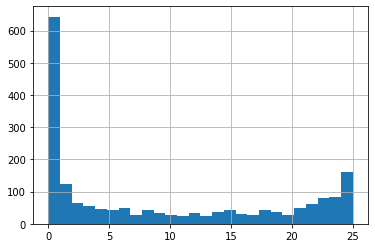

In [9]:
data['no_zero'].hist(bins=26)

In [10]:
no_merch = []
zeros = []
for i in range(26):
  no_merch.append(len(data[data['no_zero']==i]))
  zeros.append(i)

In [11]:
merch = pd.DataFrame({'no_zeros':zeros,
                      'no_merchants':no_merch})
merch = merch.set_index('no_zeros')

# max consecutive zeros

In [12]:
def max_con_zero(numbers):
  max_zeros = []
  max_temp = 0
  for i in numbers:
    if i == 0.0:
      max_temp += 1
    if i != 0.0:
      max_zeros.append(max_temp)
      max_temp = 0
  max_zeros.append(max_temp)
    
  return max(max_zeros)


In [13]:
print(max_con_zero([1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0]))

7


In [14]:
print(max_con_zero(data_clean.iloc[1900].values))

24


In [15]:
data_clean.iloc[1900].values

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 37.])

In [16]:
len(data_clean.columns)

26

In [17]:
max_cons_0 = []
for i in range(len(data)):
  max_cons_0.append(max_con_zero(data_clean.iloc[i].values))

In [18]:
data["cons_zeros"]=max_cons_0

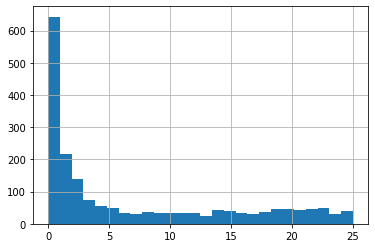

In [19]:
data['cons_zeros'].hist(bins=26)
plt.show()

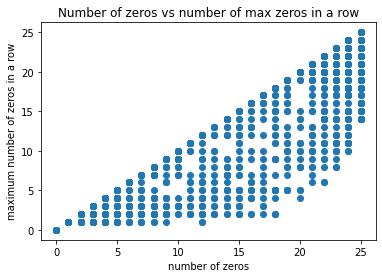

In [20]:
plt.scatter(data['no_zero'],data['cons_zeros'])
plt.xlabel("number of zeros")
plt.ylabel("maximum number of zeros in a row")
plt.title("Number of zeros vs number of max zeros in a row")
plt.show()

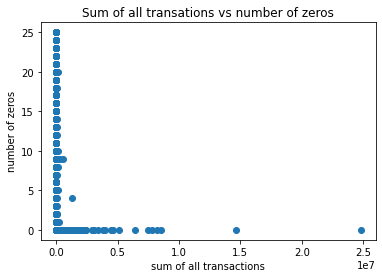

In [97]:
plt.scatter(data['total_transations'],data['no_zero'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros")
plt.title("Sum of all transations vs number of zeros")
plt.show()

In [86]:
len(data[data['cons_zeros']>11])

540

In [90]:
len(data[(data['cons_zeros']>11) & (data['begin_zeros']>11)])

409

In [21]:
data['total_transations'] = data_clean.sum(axis='columns')

In [22]:
data.head()

,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,no_zero,cons_zeros,total_transations
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0,0,0,14613142.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,52.0,432.0,86.0,108.0,72.0,101.0,80.0,0,0,1694.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,0.0,0.0,0.0,49.0,1.0,1.0,0.0,12,5,232.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,162.0,183.0,172.0,198.0,183.0,226.0,185.0,0,0,4338.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,127.0,131.0,159.0,150.0,160.0,154.0,168.0,0,0,2776.0


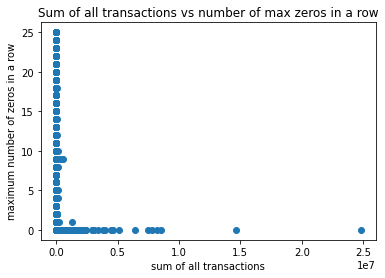

In [23]:
plt.scatter(data['total_transations'],data['cons_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("maximum number of zeros in a row")
plt.title("Sum of all transactions vs number of max zeros in a row")
plt.show()

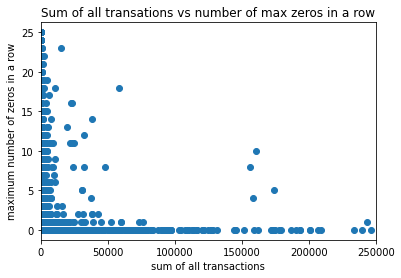

In [24]:
plt.scatter(data['total_transations'],data['cons_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("maximum number of zeros in a row")
plt.title("Sum of all transations vs number of max zeros in a row")
plt.xlim([0.0,250000.0])
plt.show()

In [25]:
len(data[data["cons_zeros"]>13])

482

# consecutive zeros at the beginning

In [27]:
def begin_con_zero(numbers):
  beg_zeros = 0
  for i in numbers:
    if i == 0.0:
      beg_zeros += 1
    else:
      return beg_zeros

In [56]:
cons_beg = []
for i in range(len(data)):
  cons_beg.append(begin_con_zero(data_clean.iloc[i].values))

In [57]:
data["begin_zeros"]=cons_beg

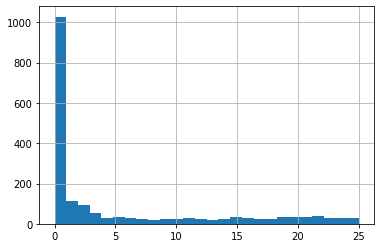

In [58]:
data["begin_zeros"].hist(bins=26)
plt.show()

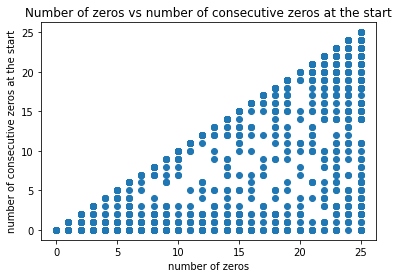

In [59]:
plt.scatter(data['no_zero'],data["begin_zeros"])
plt.xlabel("number of zeros")
plt.ylabel("number of consecutive zeros at the start")
plt.title("Number of zeros vs number of consecutive zeros at the start")
plt.show()

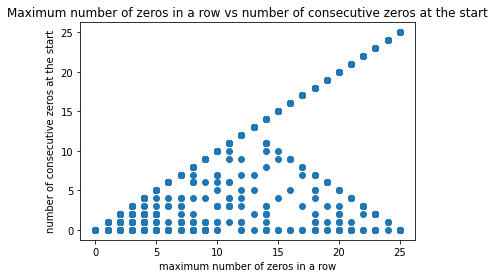

In [60]:
plt.scatter(data['cons_zeros'],data["begin_zeros"])
plt.xlabel("maximum number of zeros in a row")
plt.ylabel("number of consecutive zeros at the start")
plt.title("Maximum number of zeros in a row vs number of consecutive zeros at the start")
plt.show()

In [75]:
len(data[data["begin_zeros"]>13])

364

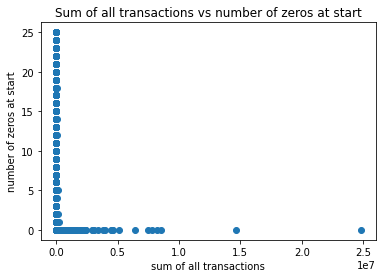

In [77]:
plt.scatter(data['total_transations'],data['begin_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros at start")
plt.title("Sum of all transactions vs number of zeros at start")
plt.show()

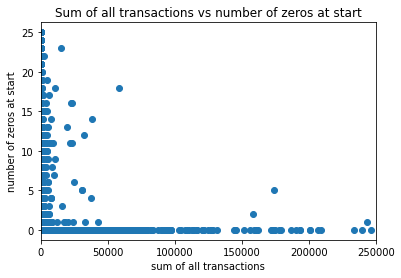

In [78]:
plt.scatter(data['total_transations'],data['begin_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros at start")
plt.title("Sum of all transactions vs number of zeros at start")
plt.xlim([0.0,250000.0])
plt.show()

# consecutive zeros at the end

In [53]:
def end_con_zero(numbers):
      return begin_con_zero(numbers[::-1])

In [61]:
cons_end = []
for i in range(len(data)):
  cons_end.append(end_con_zero(data_clean.iloc[i].values))

In [62]:
data["end_zeros"]=cons_end

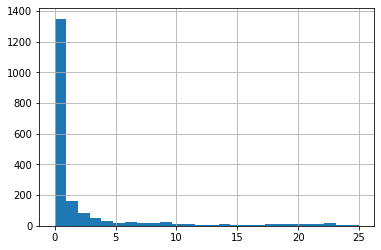

In [63]:
data["end_zeros"].hist(bins=26)
plt.show()

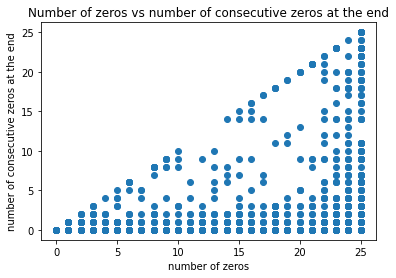

In [70]:
plt.scatter(data['no_zero'],data["end_zeros"])
plt.xlabel("number of zeros")
plt.ylabel("number of consecutive zeros at the end")
plt.title("Number of zeros vs number of consecutive zeros at the end")
plt.show()

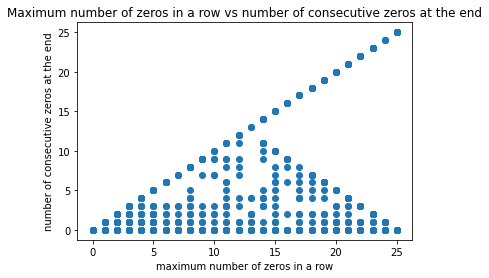

In [71]:
plt.scatter(data['cons_zeros'],data["end_zeros"])
plt.xlabel("maximum number of zeros in a row")
plt.ylabel("number of consecutive zeros at the end")
plt.title("Maximum number of zeros in a row vs number of consecutive zeros at the end")
plt.show()

In [84]:
len(data[data["end_zeros"]>11])

120

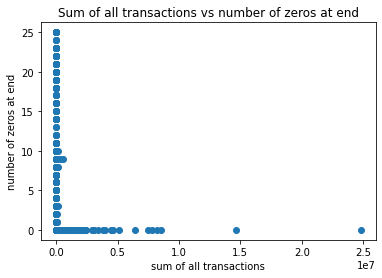

In [79]:
plt.scatter(data['total_transations'],data['end_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros at end")
plt.title("Sum of all transactions vs number of zeros at end")
plt.show()

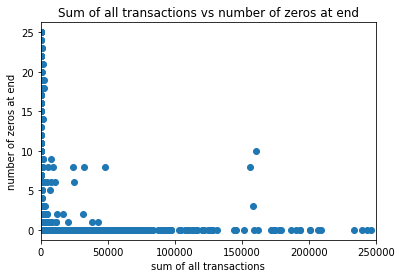

In [82]:
plt.scatter(data['total_transations'],data['end_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros at end")
plt.title("Sum of all transactions vs number of zeros at end")
plt.xlim([0.0,250000.0])
plt.show()

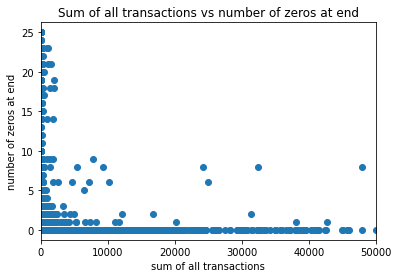

In [83]:
plt.scatter(data['total_transations'],data['end_zeros'])
plt.xlabel("sum of all transactions")
plt.ylabel("number of zeros at end")
plt.title("Sum of all transactions vs number of zeros at end")
plt.xlim([0.0,50000.0])
plt.show()

In [93]:
len(data[data['end_zeros']>11])

120

In [95]:
len(data[data['begin_zeros']>6])

530

In [98]:
data[data['cons_zeros']>5]['total_transations'].max()

519335.0

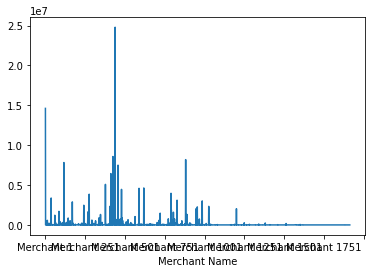

In [101]:
data['total_transations'].plot()

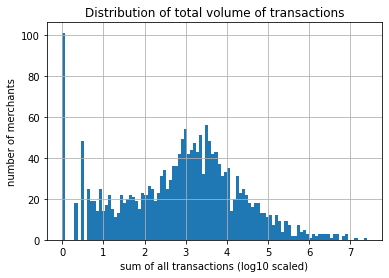

In [108]:
np.log10(data['total_transations']).hist(bins=100)
plt.xlabel("sum of all transactions (log10 scaled)")
plt.ylabel("number of merchants")
plt.title("Distribution of total volume of transactions")
plt.show()

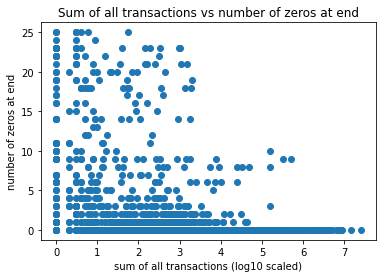

In [107]:
plt.scatter(np.log10(data['total_transations']),data['end_zeros'])
plt.xlabel("sum of all transactions (log10 scaled)")
plt.ylabel("number of zeros at end")
plt.title("Sum of all transactions vs number of zeros at end")
plt.show()

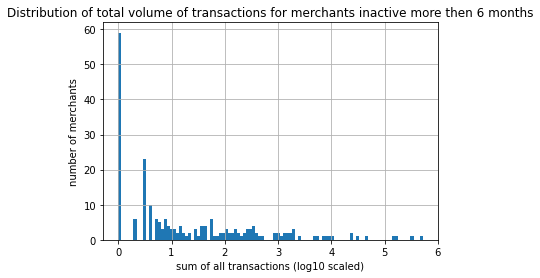

In [110]:
np.log10(data[data['end_zeros']>5]['total_transations']).hist(bins=100)
plt.xlabel("sum of all transactions (log10 scaled)")
plt.ylabel("number of merchants")
plt.title("Distribution of total volume of transactions for merchants inactive more then 6 months")
plt.show()

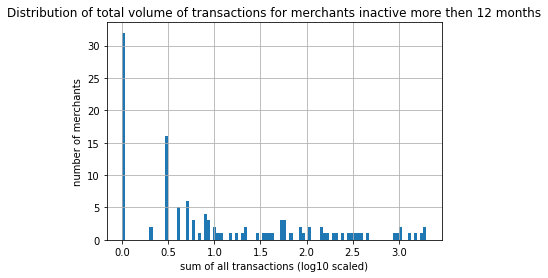

In [111]:
np.log10(data[data['end_zeros']>11]['total_transations']).hist(bins=100)
plt.xlabel("sum of all transactions (log10 scaled)")
plt.ylabel("number of merchants")
plt.title("Distribution of total volume of transactions for merchants inactive more then 12 months")
plt.show()

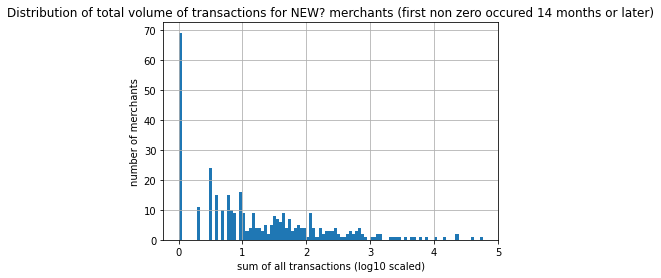

In [112]:
np.log10(data[data['begin_zeros']>13]['total_transations']).hist(bins=100)
plt.xlabel("sum of all transactions (log10 scaled)")
plt.ylabel("number of merchants")
plt.title("Distribution of total volume of transactions for NEW? merchants (first non zero occured 14 months or later)")
plt.show()